#Simulación de los tres cuerpos




*   Sergio Florez
*   Daniel Mora

*   Juan Felipe Rojas








Domumentación:


*   Ctrl+F9
*   Entorno de ejecución -> Ejecutar todas



In [ ]:
#! python3
# A program that produces trajectories of three bodies
# according to Netwon's laws of gravitation

# import third-party libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('dark_background')

In [ ]:
# masses of planets
m_1 = 10
m_2 = 20
m_3 = 30

# starting coordinates for planets
# p1_start = x_1, y_1, z_1
p1_start = np.array([-10, 10, -11])
v1_start = np.array([-3, 0, 0])

# p2_start = x_2, y_2, z_2
p2_start = np.array([0, 0, 0])
v2_start = np.array([0, 0, 0])

# p3_start = x_3, y_3, z_3
p3_start = np.array([10, 10, 12])
v3_start = np.array([3, 0, 0])


In [ ]:
def accelerations(p1, p2, p3):
	"""
	A function to calculate the derivatives of x, y, and z
	given 3 object and their locations according to Newton's laws

	"""
	# Accessing global variables m_1, m_2, m_3 directly
	# instead of using self
	planet_1_dv = -9.8 * m_2 * (p1 - p2)/(np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 + (p1[2] - p2[2])**2)**3) - \
		       9.8 * m_3 * (p1 - p3)/(np.sqrt((p1[0] - p3[0])**2 + (p1[1] - p3[1])**2 + (p1[2] - p3[2])**2)**3)

	planet_2_dv = -9.8 * m_3 * (p2 - p3)/(np.sqrt((p2[0] - p3[0])**2 + (p2[1] - p3[1])**2 + (p2[2] - p3[2])**2)**3) - \
		       9.8 * m_1 * (p2 - p1)/(np.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2 + (p2[2] - p1[2])**2)**3)

	planet_3_dv = -9.8 * m_1 * (p3 - p1)/(np.sqrt((p3[0] - p1[0])**2 + (p3[1] - p1[1])**2 + (p3[2] - p1[2])**2)**3) - \
		       9.8 * m_2 * (p3 - p2)/(np.sqrt((p3[0] - p2[0])**2 + (p3[1] - p2[1])**2 + (p3[2] - p2[2])**2)**3)

	return planet_1_dv, planet_2_dv, planet_3_dv

In [ ]:
# parameters
delta_t = 0.001
steps = 200000

# initialize trajectory array
p1 = np.array([[0.,0.,0.] for i in range(steps)])
v1 = np.array([[0.,0.,0.] for i in range(steps)])

p2 = np.array([[0.,0.,0.] for j in range(steps)])
v2 = np.array([[0.,0.,0.] for j in range(steps)])

p3 = np.array([[0.,0.,0.] for k in range(steps)])
v3 = np.array([[0.,0.,0.] for k in range(steps)])



In [ ]:
# starting point and velocity
p1[0], p2[0], p3[0] = p1_start, p2_start, p3_start

v1[0], v2[0], v3[0] = v1_start, v2_start, v3_start


In [ ]:
# evolution of the system
for i in range(steps-1):
	# calculate derivatives
	dv1, dv2, dv3 = accelerations(p1[i], p2[i], p3[i])

	v1[i + 1] = v1[i] + dv1 * delta_t
	v2[i + 1] = v2[i] + dv2 * delta_t
	v3[i + 1] = v3[i] + dv3 * delta_t

	p1[i + 1] = p1[i] + v1[i] * delta_t
	p2[i + 1] = p2[i] + v2[i] * delta_t
	p3[i + 1] = p3[i] + v3[i] * delta_t



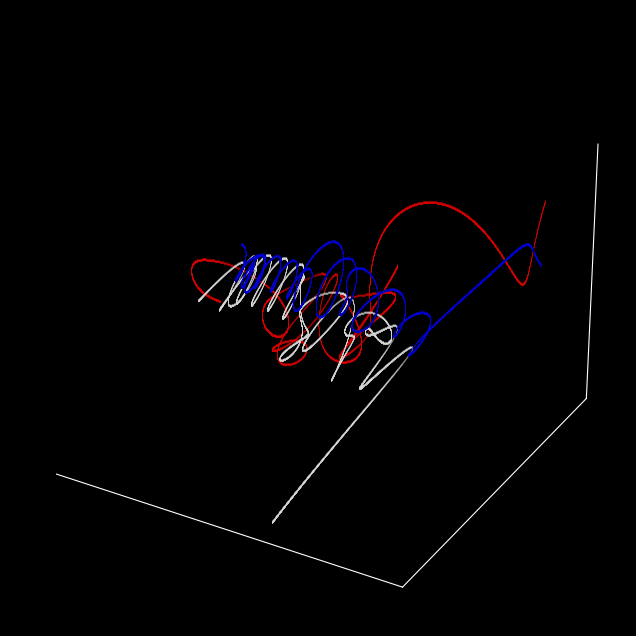

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
plt.gca().patch.set_facecolor('black')

plt.plot([i[0] for i in p1], [j[1] for j in p1], [k[2] for k in p1] , '^', color='red', lw = 0.05, markersize = 0.01, alpha=0.5)
plt.plot([i[0] for i in p2], [j[1] for j in p2], [k[2] for k in p2] , '^', color='white', lw = 0.05, markersize = 0.01, alpha=0.5)
plt.plot([i[0] for i in p3], [j[1] for j in p3], [k[2] for k in p3] , '^', color='blue', lw = 0.05, markersize = 0.01, alpha=0.5)

plt.axis('on')

# optional: use if reference axes skeleton is desired,
# ie plt.axis is set to 'on'
ax.set_xticks([]), ax.set_yticks([]), ax.set_zticks([])


# make panes have the same color as the background
# Replacing w_xaxis, w_yaxis, w_zaxis with xaxis, yaxis, zaxis
ax.xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
ax.yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
plt.show()
plt.close()



##**Realizar un análisis numérico sobre los resultados de la simulación de los tres cuerpos**

In [ ]:
import pandas as pd
import numpy as np
import math


# Create an empty list to store data
data = []

# Initial velocity modifications (example)
for i in range(11):
    delta_v = 1 * pow(10, -i)
    v1_start_modified = v1_start + np.array([delta_v, 0, 0]) #modify only the x component of the velocity

    #Re-run simulation with modified velocity

    # initialize trajectory array (must be inside this loop to reset the arrays)
    p1_mod = np.array([[0.,0.,0.] for i in range(steps)])
    v1_mod = np.array([[0.,0.,0.] for i in range(steps)])

    p2_mod = np.array([[0.,0.,0.] for j in range(steps)])
    v2_mod = np.array([[0.,0.,0.] for j in range(steps)])

    p3_mod = np.array([[0.,0.,0.] for k in range(steps)])
    v3_mod = np.array([[0.,0.,0.] for k in range(steps)])


    # starting point and velocity
    p1_mod[0], p2_mod[0], p3_mod[0] = p1_start, p2_start, p3_start
    v1_mod[0], v2_mod[0], v3_mod[0] = v1_start_modified, v2_start, v3_start

    for j in range(steps-1):
      # calculate derivatives
      dv1, dv2, dv3 = accelerations(p1_mod[j], p2_mod[j], p3_mod[j])

      v1_mod[j + 1] = v1_mod[j] + dv1 * delta_t
      v2_mod[j + 1] = v2_mod[j] + dv2 * delta_t
      v3_mod[j + 1] = v3_mod[j] + dv3 * delta_t

      p1_mod[j + 1] = p1_mod[j] + v1_mod[j] * delta_t
      p2_mod[j + 1] = p2_mod[j] + v2_mod[j] * delta_t
      p3_mod[j + 1] = p3_mod[j] + v3_mod[j] * delta_t

    # Append data to the list using NumPy arrays directly
    data.append([delta_v, p1_mod[-1], v1_mod[-1], p2_mod[-1], v2_mod[-1], p3_mod[-1], v3_mod[-1]])

# Create a pandas DataFrame
columns = ['delta_v', 'p1_final', 'v1_final', 'p2_final', 'v2_final', 'p3_final', 'v3_final']
df = pd.DataFrame(data, columns=columns)

df

,delta_v,p1_final,v1_final,p2_final,v2_final,p3_final,v3_final
0,1.000000e+00,"[247.75279011086585, 3.9268116029293547, -10.0...","[-8.500946718082835, 1.1879126410805971, 3.556...","[208.31570080514192, 9.186168036633418, 30.158...","[3.154292272082347, -0.14874970866305903, -0.9...","[251.86960275961692, 5.9002841079294654, -8.42...","[3.0641207246394084, -0.2968044079181802, -0.5..."
1,1.000000e-01,"[-71.63068779819514, -175.37619905842487, 65.2...","[-3.369708196753188, -2.7542551877890165, 1.11...","[255.19957188964844, 44.19344720977821, 4.8109...","[2.541114077713929, -0.23483374460684334, 1.55...","[267.07514800628695, 42.32976821296101, -16.61...","[1.4624933471083374, 1.074640892334244, -1.410..."
2,1.000000e-02,"[224.88063697564306, -13.08780091600178, -24.5...","[0.26357599688429045, -0.3888300683206078, -0....","[198.400402778905, 10.244911804602268, 22.2498...","[3.4832143870442596, -0.15535945885849053, -0....","[200.10418248886342, 10.865992435596635, 1.671...","[-0.4066682569909111, 0.23318299534584466, 0.6..."
3,1.000000e-03,"[182.5465567924004, 65.8885760335736, 60.63027...","[0.05921840694125155, 3.824946633907993, 4.012...","[238.37207991061237, 4.490079055643755, -24.45...","[2.018171270201542, -0.4528554558484107, -2.10...","[186.96776079545646, -11.622911381612626, 4.42...","[0.6351463508851627, -0.9730785740703088, 0.06..."
4,1.000000e-04,"[76.29614723073891, 9.171378650526709, 100.944...","[-0.6401349509393667, -0.13959990751334744, 1....","[236.6519784846681, 8.368776364245955, -15.180...","[0.38955782028126373, -2.083261968852972, -3.1...","[223.47129856664188, 4.697022873660536, -15.19...","[1.953706436792255, 1.4353746150730975, 1.6061..."
5,1.000000e-05,"[197.66289824623306, 1.9717229830761691, -9.98...","[3.2027666178242136, -0.16579271842147056, 1.0...","[217.07442539069274, 5.566165693849189, 1.4433...","[0.1932583923346321, -0.7567765230180592, -3.6...","[196.06141698746526, 8.965315209737467, 10.698...","[0.803575532502182, 0.5597819214858306, 2.0941..."
6,1.000000e-06,"[400.79575720540475, 1.3601752026420402, -92.9...","[2.4147100380170023, -0.20500691379784605, -1....","[311.86806251258224, -125.03980507461822, -130...","[3.951901572302372, -2.829651416920391, -3.134...","[65.15410592280676, 96.23981164886166, 126.555...","[-1.4395040608739544, 1.954769915879553, 2.493..."
7,1.000000e-07,"[200.258293182103, -0.0994602236076823, -20.95...","[-1.9963831717193523, -0.9678980130474085, -0....","[188.31774025798538, 18.685599837693093, 19.02...","[2.7700778705166313, -0.5771137542035499, 0.09...","[214.36674876727443, 0.9094201827414065, 2.630...","[0.8187425102286782, 0.707375173818169, 0.2094..."
8,1.000000e-08,"[258.2353089570311, 39.61811270729668, 58.8610...","[1.0989460060766467, 0.6112718716240032, 3.883...","[61.5677345586435, -52.92488913448294, -89.982...","[-1.2842340602114464, -0.9070943876564748, -1....","[279.5410746418854, 35.41055518722058, 48.7016...","[2.489840708115374, 0.4009723012296155, -0.384..."
9,1.000000e-09,"[246.51049309787308, 22.744906105588782, 18.85...","[-1.3935997376528495, 2.556688803472966, -1.25...","[130.70000097041049, -43.50406759850266, -43.9...","[-0.9447073460436606, -1.3391202208563864, -0....","[237.36116838710387, 34.75440969713967, 31.377...","[3.094338143580084, 0.04051721274659111, 1.081..."


Con el DataFrame es facil observar los resultados finales y como varian con respecto a los cambios en la velocidad (delta_v), gracias a esto nos damos cuenta que los valores son completamente impredecibles entre si, no siguen ningun tipo de patron en ningun momento, aunque solo se cambie una de las variables levemente en uno de los cuerpos.

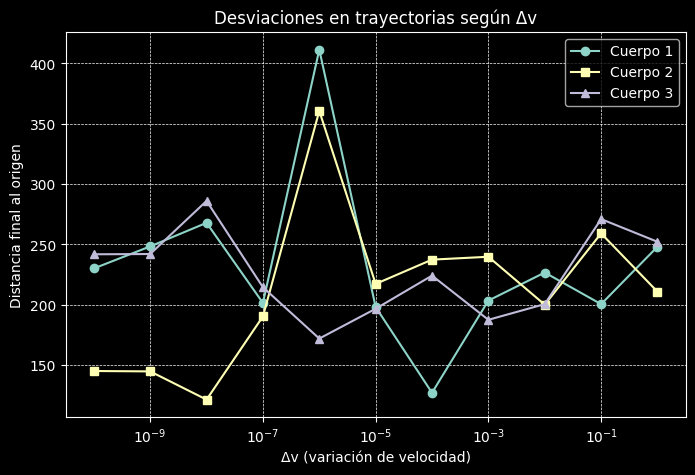

In [ ]:
df["dist_p1"] = df["p1_final"].apply(lambda p: np.linalg.norm(p))
df["dist_p2"] = df["p2_final"].apply(lambda p: np.linalg.norm(p))
df["dist_p3"] = df["p3_final"].apply(lambda p: np.linalg.norm(p))

# Crear la figura y los ejes
plt.figure(figsize=(8, 5))

# Graficar la distancia final de cada cuerpo respecto al origen en función de Δv
plt.plot(df["delta_v"], df["dist_p1"], label="Cuerpo 1", marker="o")
plt.plot(df["delta_v"], df["dist_p2"], label="Cuerpo 2", marker="s")
plt.plot(df["delta_v"], df["dist_p3"], label="Cuerpo 3", marker="^")

# Configuración del gráfico
plt.xscale("log")  # Usar escala logarítmica para mejor visualización
plt.xlabel("Δv (variación de velocidad)")
plt.ylabel("Distancia final al origen")
plt.title("Desviaciones en trayectorias según Δv")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Mostrar la gráfica
plt.show()

Podemos observar que los cuerpos presentan comportamientso completamente aleatorios, aunque se puede observar ciertas cercanias en algunos casos. Esta grafica tambien nos muestra que un minimo cambio en las condiciones iniciales de un solo objeto puede alterar drasticamente el modelo, y sin la capacidad de predecir los resultados.

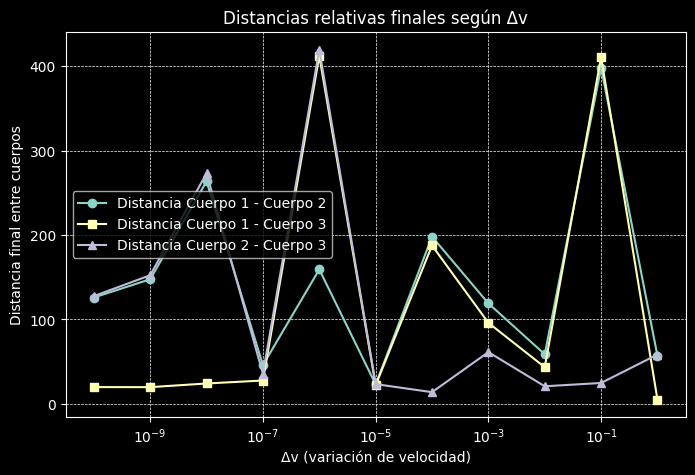

In [ ]:
# Calcular las distancias finales entre los cuerpos
df["dist_12"] = df.apply(lambda row: np.linalg.norm(row["p1_final"] - row["p2_final"]), axis=1)
df["dist_13"] = df.apply(lambda row: np.linalg.norm(row["p1_final"] - row["p3_final"]), axis=1)
df["dist_23"] = df.apply(lambda row: np.linalg.norm(row["p2_final"] - row["p3_final"]), axis=1)

# Crear la figura
plt.figure(figsize=(8, 5))

# Graficar las distancias relativas entre los cuerpos en función de Δv
plt.plot(df["delta_v"], df["dist_12"], label="Distancia Cuerpo 1 - Cuerpo 2", marker="o")
plt.plot(df["delta_v"], df["dist_13"], label="Distancia Cuerpo 1 - Cuerpo 3", marker="s")
plt.plot(df["delta_v"], df["dist_23"], label="Distancia Cuerpo 2 - Cuerpo 3", marker="^")

# Configuración del gráfico
plt.xscale("log")  # Escala logarítmica en Δv
plt.xlabel("Δv (variación de velocidad)")
plt.ylabel("Distancia final entre cuerpos")
plt.title("Distancias relativas finales según Δv")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Mostrar la gráfica
plt.show()


En esta grafica podemos observar mejor la similitud en ciertos cuerpos o todas las distancias aumentan al mismo ritmo. Esto indica que algunos pares de cuerpos pueden estar interactuando de manera más fuerte que otros, lo que podria indicar que el tercer cuerpo fue expulsado, pareciendo mas un sistema de 2 cuerpos al final de la simulacion. Sin embargo el modelo sigue siendo imposible de predecir.

# **Realice una modificación para que la simulación sea de 4 cuerpos.  Que cambia con la simulación de tres cuerpos**

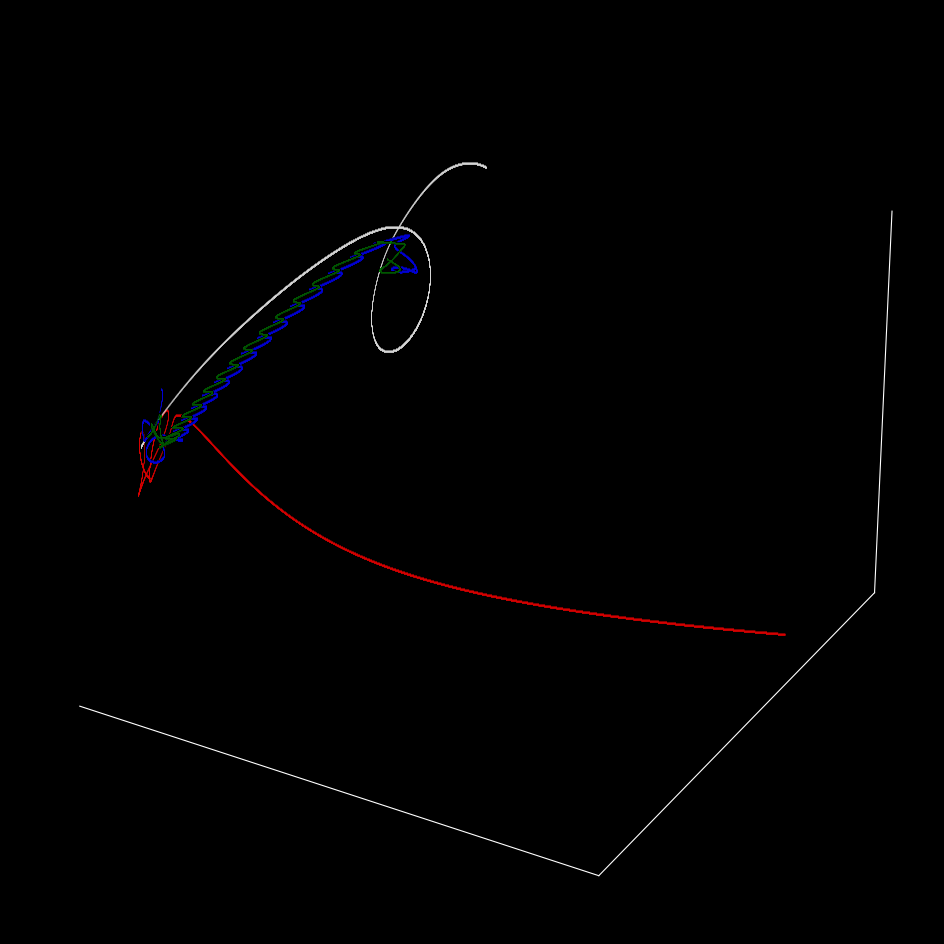

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# masses of planets
m_1 = 10
m_2 = 20
m_3 = 30
m_4 = 40  # Mass of the fourth body

# starting coordinates for planets
p1_start = np.array([-10, 10, -11])
v1_start = np.array([-3, 0, 0])

p2_start = np.array([0, 0, 0])
v2_start = np.array([0, 0, 0])

p3_start = np.array([10, 10, 12])
v3_start = np.array([3, 0, 0])

p4_start = np.array([20, -5, 5])  # Initial position of the fourth body
v4_start = np.array([0, 2, 0])   # Initial velocity of the fourth body

def accelerations(p1, p2, p3, p4):
    planet_1_dv = -9.8 * m_2 * (p1 - p2) / (np.linalg.norm(p1 - p2)**3) - \
                  9.8 * m_3 * (p1 - p3) / (np.linalg.norm(p1 - p3)**3) - \
                  9.8 * m_4 * (p1 - p4) / (np.linalg.norm(p1 - p4)**3)

    planet_2_dv = -9.8 * m_3 * (p2 - p3) / (np.linalg.norm(p2 - p3)**3) - \
                  9.8 * m_1 * (p2 - p1) / (np.linalg.norm(p2 - p1)**3) - \
                  9.8 * m_4 * (p2 - p4) / (np.linalg.norm(p2 - p4)**3)

    planet_3_dv = -9.8 * m_1 * (p3 - p1) / (np.linalg.norm(p3 - p1)**3) - \
                  9.8 * m_2 * (p3 - p2) / (np.linalg.norm(p3 - p2)**3) - \
                  9.8 * m_4 * (p3 - p4) / (np.linalg.norm(p3 - p4)**3)

    planet_4_dv = -9.8 * m_1 * (p4 - p1) / (np.linalg.norm(p4 - p1)**3) - \
                  9.8 * m_2 * (p4 - p2) / (np.linalg.norm(p4 - p2)**3) - \
                  9.8 * m_3 * (p4 - p3) / (np.linalg.norm(p4 - p3)**3)

    return planet_1_dv, planet_2_dv, planet_3_dv, planet_4_dv

# parameters
delta_t = 0.001
steps = 200000

# initialize trajectory arrays
p1 = np.array([[0.,0.,0.] for i in range(steps)])
v1 = np.array([[0.,0.,0.] for i in range(steps)])

p2 = np.array([[0.,0.,0.] for j in range(steps)])
v2 = np.array([[0.,0.,0.] for j in range(steps)])

p3 = np.array([[0.,0.,0.] for k in range(steps)])
v3 = np.array([[0.,0.,0.] for k in range(steps)])

p4 = np.array([[0.,0.,0.] for l in range(steps)]) # Trajectory for the fourth body
v4 = np.array([[0.,0.,0.] for l in range(steps)]) # Velocity for the fourth body

# starting point and velocity
p1[0], p2[0], p3[0], p4[0] = p1_start, p2_start, p3_start, p4_start
v1[0], v2[0], v3[0], v4[0] = v1_start, v2_start, v3_start, v4_start

# evolution of the system
for i in range(steps-1):
    dv1, dv2, dv3, dv4 = accelerations(p1[i], p2[i], p3[i], p4[i])

    v1[i + 1] = v1[i] + dv1 * delta_t
    v2[i + 1] = v2[i] + dv2 * delta_t
    v3[i + 1] = v3[i] + dv3 * delta_t
    v4[i + 1] = v4[i] + dv4 * delta_t

    p1[i + 1] = p1[i] + v1[i] * delta_t
    p2[i + 1] = p2[i] + v2[i] * delta_t
    p3[i + 1] = p3[i] + v3[i] * delta_t
    p4[i + 1] = p4[i] + v4[i] * delta_t

#Plotting
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
plt.gca().patch.set_facecolor('black')

plt.plot([i[0] for i in p1], [j[1] for j in p1], [k[2] for k in p1] , '^', color='red', lw = 0.05, markersize = 0.01, alpha=0.5)
plt.plot([i[0] for i in p2], [j[1] for j in p2], [k[2] for k in p2] , '^', color='white', lw = 0.05, markersize = 0.01, alpha=0.5)
plt.plot([i[0] for i in p3], [j[1] for j in p3], [k[2] for k in p3] , '^', color='blue', lw = 0.05, markersize = 0.01, alpha=0.5)
plt.plot([i[0] for i in p4], [j[1] for j in p4], [k[2] for k in p4] , '^', color='green', lw = 0.05, markersize = 0.01, alpha=0.5) #Plot the fourth body

plt.axis('on')
ax.set_xticks([]), ax.set_yticks([]), ax.set_zticks([])
ax.xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
ax.yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
plt.show()
plt.close()


La adición de un cuarto cuerpo a la simulación introduce una nueva fuente de interacción gravitacional que puede perturbar las dinamicas previas y llevar a la dispersión de uno o más cuerpos teniendo como resultado movimientoas mas abruptos. Este comportamiento es un ejemplo de la complejidad de los sistemas dinámicos con múltiples cuerpos interactuando, donde pequeñas variaciones en las condiciones iniciales o en el número de elementos pueden llevar a resultados significativamente diferentes en las trayectorias y posiciones.

# Realice la simulación de dos cuerpos.

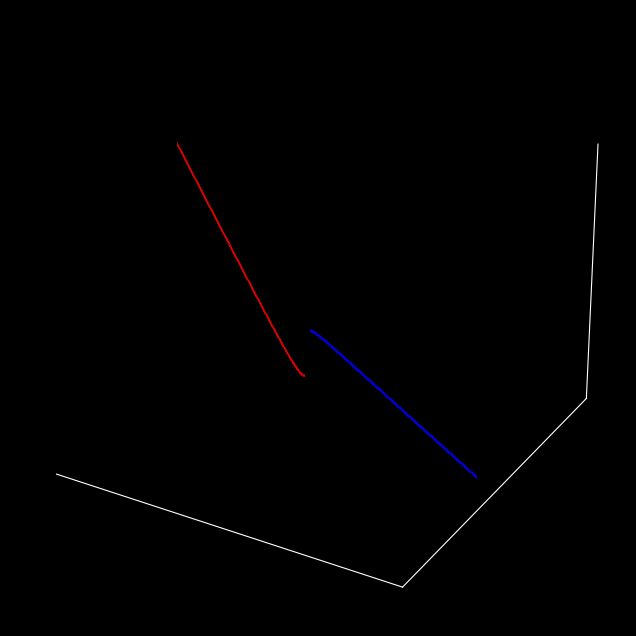

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# masses of planets
m_1 = 10
m_2 = 20

# starting coordinates for planets
p1_start = np.array([-10, 10, -11])
v1_start = np.array([-3, 0, 0])

p2_start = np.array([10, 10, 12])
v2_start = np.array([3, 0, 0])

def accelerations(p1, p2):
	"""
	Calculate the derivatives of x, y, and z for two bodies.
	"""
	planet_1_dv = -9.8 * m_2 * (p1 - p2)/(np.sqrt(np.sum((p1 - p2)**2))**3)
	planet_2_dv = -9.8 * m_1 * (p2 - p1)/(np.sqrt(np.sum((p2 - p1)**2))**3)
	return planet_1_dv, planet_2_dv

# parameters
delta_t = 0.001
steps = 200000

# initialize trajectory array
p1 = np.array([[0.,0.,0.] for i in range(steps)])
v1 = np.array([[0.,0.,0.] for i in range(steps)])

p2 = np.array([[0.,0.,0.] for j in range(steps)])
v2 = np.array([[0.,0.,0.] for j in range(steps)])

# starting point and velocity
p1[0], p2[0] = p1_start, p2_start
v1[0], v2[0] = v1_start, v2_start

# evolution of the system
for i in range(steps-1):
	# calculate derivatives
	dv1, dv2 = accelerations(p1[i], p2[i])

	v1[i + 1] = v1[i] + dv1 * delta_t
	v2[i + 1] = v2[i] + dv2 * delta_t

	p1[i + 1] = p1[i] + v1[i] * delta_t
	p2[i + 1] = p2[i] + v2[i] * delta_t

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
plt.gca().patch.set_facecolor('black')

plt.plot([i[0] for i in p1], [j[1] for j in p1], [k[2] for k in p1] , '^', color='red', lw = 0.05, markersize = 0.01, alpha=0.5)
plt.plot([i[0] for i in p2], [j[1] for j in p2], [k[2] for k in p2] , '^', color='blue', lw = 0.05, markersize = 0.01, alpha=0.5)

plt.axis('on')
ax.set_xticks([]), ax.set_yticks([]), ax.set_zticks([])

ax.xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
ax.yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
plt.show()
plt.close()


La dispersión de dos cuerpos en la simulación puede ser causada por una velocidad inicial demasiado alta, una dirección de velocidad inicial inadecuada o una distancia inicial demasiado grande. Para que los cuerpos se mantengan en órbitas estables, es necesario que la velocidad inicial y la distancia entre ellos estén en un rango específico

# **Realice una conclusión de la simulación y como se aplica a los sistemas complejos**



En sistemas con pocos cuerpos, la introducción de un cuerpo adicional perturba el 'equilibrio' y puede llevar a la dispersión de uno o más cuerpos.

La simulación demuestra la complejidad inherente a los sistemas dinámicos con múltiples cuerpos interactuando. Pequeñas variaciones en las condiciones iniciales, como la velocidad o la posición de un cuerpo, pueden conducir a resultados significativamente diferentes a largo plazo. esto es comparable con la interrelacionalidad entre las varibles de un sistema complejo las cuales dan pie a compartamientos emergentes completamente disperpsas con variaciones distintas.

La simulación de cuatro cuerpos es un ejemplo de un sistema caótico, donde es difícil predecir el comportamiento a largo plazo debido a la sensibilidad a las condiciones iniciales. Esto nos muestra que incluso en sistemas aparentemente simples, la complejidad puede surgir y dar lugar a resultados impredecibles.
